## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

## Barplot config

In [2]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.3f}%'.format(p.get_height()*100)
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() #+ 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.3f}%'.format(p.get_width()*100)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
     

# Stats

In [3]:
stats_unique_words_df = pd.read_csv("stats_unique_words_df.csv", index_col = 0)
stats_unique_words_df

,items_list,stats
0,total_unique_words,624083
1,total_unique_words_lh,13285
2,clitics,5499
3,total_unique_words_nh,11208
4,diminutives,4222
5,total_unique_words_p,122224
6,total_unique_words_m,134606


In [4]:
max_total_words_length = stats_unique_words_df["stats"].max()

stats_unique_words_df["stats"] = stats_unique_words_df["stats"]/max_total_words_length
stats_unique_words_df["stats"] = stats_unique_words_df["stats"].round(5)
stats_unique_words_df.drop(index=stats_unique_words_df.index[0], axis=0, inplace=True)
stats_unique_words_df

,items_list,stats
1,total_unique_words_lh,0.02129
2,clitics,0.00881
3,total_unique_words_nh,0.01796
4,diminutives,0.00677
5,total_unique_words_p,0.19585
6,total_unique_words_m,0.21569


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

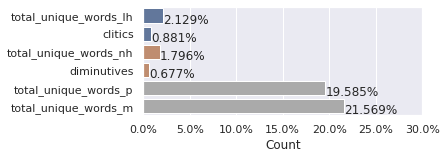

In [5]:
all_colors = {
    #'word_all': '#dddddd',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="stats", y="items_list" , data=stats_unique_words_df)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 2)
ax.set(xlabel="Count", ylabel="")

In [6]:
stats_df = pd.read_csv("stats_df.csv", index_col = 0)
stats_df

,items_list,stats
0,total_words,171484377
1,total_words_lh,1620445
2,total_words_lh_clitic,132289
3,total_words_nh,1631244
4,total_words_diminutive,94652
5,total_words_p,24042739
6,total_words_m,21020334


In [7]:
max_total_words_length = stats_df["stats"].max()

stats_df["stats"] = stats_df["stats"]/max_total_words_length
stats_df["stats"] = stats_df["stats"].round(5)
stats_df.drop(index=stats_df.index[0], axis=0, inplace=True)
stats_df

,items_list,stats
1,total_words_lh,0.00945
2,total_words_lh_clitic,0.00077
3,total_words_nh,0.00951
4,total_words_diminutive,0.00055
5,total_words_p,0.14020
6,total_words_m,0.12258


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

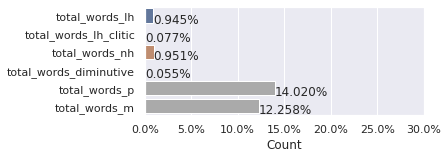

In [8]:
all_colors = {
    #'word_all': '#dddddd',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="stats", y="items_list" , data=stats_df)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 2)
ax.set(xlabel="Count", ylabel="")